In [ ]:
import tweepy as tw
import pandas as pd
import os

from datetime import date
from datetime import datetime
import time

In [2]:

ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

CONSUMER_API_KEY =  ""
CONSUMER_API_SECRET = ""

## Get Tweets

In [3]:
# Create an authentication object
auth = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)

# setting access tokens and secret
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create the API object passing the auth object
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# using the API object, get tweets from your time line and store into a variable called my tweets
my_tweets = api.home_timeline()
print(my_tweets)

[Status(_api=<tweepy.api.API object at 0x000001FE268F17C0>, _json={'created_at': 'Sat Mar 06 13:45:04 +0000 2021', 'id': 1368195932056092673, 'id_str': '1368195932056092673', 'text': 'Senate OKs extension of $300 weekly unemployment benefit after long delay https://t.co/tGMgk994le https://t.co/c8iSBY3nhR', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tGMgk994le', 'expanded_url': 'https://yhoo.it/3qnq08T', 'display_url': 'yhoo.it/3qnq08T', 'indices': [74, 97]}], 'media': [{'id': 1368195930198077442, 'id_str': '1368195930198077442', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/media/EvzO8xKXcAIvfGG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EvzO8xKXcAIvfGG.jpg', 'url': 'https://t.co/c8iSBY3nhR', 'display_url': 'pic.twitter.com/c8iSBY3nhR', 'expanded_url': 'https://twitter.com/YahooNews/status/1368195932056092673/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}

In [5]:
# Check all the pulled tweets in a friendly format
for tweet in my_tweets:
    print(tweet.text)
    print(tweet.created_at, "\n", tweet.user.id, "\n", tweet.user.screen_name, "\n", tweet.user.location, "\n")

Senate OKs extension of $300 weekly unemployment benefit after long delay https://t.co/tGMgk994le https://t.co/c8iSBY3nhR
2021-03-06 13:45:04 
 7309052 
 YahooNews 
 New York City 

Each March, Canada marks #FrancophonieMonth by celebrating its linguistic and cultural diversity. Check out… https://t.co/rLlxV55B3V
2021-03-06 13:41:22 
 227032547 
 CanadainIndia 
 India 

#IndiaFightsCorona:

📍Can shoes 👠 spread #COVID19 virus❓❓❓

↗️The likelihood of #COVID19 being spread on shoes and… https://t.co/JtdOfE0OvA
2021-03-06 13:39:42 
 1244892413262311425 
 COVIDNewsByMIB 
  

RT @YahooFinance: "It's incredible news for all of us," Dr. Sejal Hathi, host of 'Civic Rx' podcast, says about the Johnson &amp; Johnson vacci…
2021-03-06 13:36:00 
 19546277 
 YahooFinance 
 New York, NY 

LIVE: વસંતોત્સવ 2021

https://t.co/LICdoiG9Vi
2021-03-06 13:35:46 
 627355202 
 vijayrupanibjp 
 Gandhinagar  

'People should be worried' about coronavirus variants, expert says https://t.co/YdiLNacu7b https://t.co

## Get required Tweets

In [6]:
tweets = api.home_timeline(count=10)
print(tweets)

[Status(_api=<tweepy.api.API object at 0x000001FE268F17C0>, _json={'created_at': 'Sat Mar 06 13:45:04 +0000 2021', 'id': 1368195932056092673, 'id_str': '1368195932056092673', 'text': 'Senate OKs extension of $300 weekly unemployment benefit after long delay https://t.co/tGMgk994le https://t.co/c8iSBY3nhR', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/tGMgk994le', 'expanded_url': 'https://yhoo.it/3qnq08T', 'display_url': 'yhoo.it/3qnq08T', 'indices': [74, 97]}], 'media': [{'id': 1368195930198077442, 'id_str': '1368195930198077442', 'indices': [98, 121], 'media_url': 'http://pbs.twimg.com/media/EvzO8xKXcAIvfGG.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EvzO8xKXcAIvfGG.jpg', 'url': 'https://t.co/c8iSBY3nhR', 'display_url': 'pic.twitter.com/c8iSBY3nhR', 'expanded_url': 'https://twitter.com/YahooNews/status/1368195932056092673/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}

In [7]:
# Check all the pulled tweets in a friendly format
for tweet in tweets:
    print(tweet.text)
    print(tweet.created_at, "\n", tweet.user.id, "\n", tweet.user.screen_name, "\n", tweet.user.location, "\n")

Senate OKs extension of $300 weekly unemployment benefit after long delay https://t.co/tGMgk994le https://t.co/c8iSBY3nhR
2021-03-06 13:45:04 
 7309052 
 YahooNews 
 New York City 

Each March, Canada marks #FrancophonieMonth by celebrating its linguistic and cultural diversity. Check out… https://t.co/rLlxV55B3V
2021-03-06 13:41:22 
 227032547 
 CanadainIndia 
 India 

#IndiaFightsCorona:

📍Can shoes 👠 spread #COVID19 virus❓❓❓

↗️The likelihood of #COVID19 being spread on shoes and… https://t.co/JtdOfE0OvA
2021-03-06 13:39:42 
 1244892413262311425 
 COVIDNewsByMIB 
  

RT @YahooFinance: "It's incredible news for all of us," Dr. Sejal Hathi, host of 'Civic Rx' podcast, says about the Johnson &amp; Johnson vacci…
2021-03-06 13:36:00 
 19546277 
 YahooFinance 
 New York, NY 

LIVE: વસંતોત્સવ 2021

https://t.co/LICdoiG9Vi
2021-03-06 13:35:46 
 627355202 
 vijayrupanibjp 
 Gandhinagar  

'People should be worried' about coronavirus variants, expert says https://t.co/YdiLNacu7b https://t.co

In [8]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

Senate OKs extension of $300 weekly unemployment benefit after long delay https://t.co/tGMgk994le https://t.co/c8iSBY3nhR
Each March, Canada marks #FrancophonieMonth by celebrating its linguistic and cultural diversity. Check out… https://t.co/rLlxV55B3V
#IndiaFightsCorona:

📍Can shoes 👠 spread #COVID19 virus❓❓❓

↗️The likelihood of #COVID19 being spread on shoes and… https://t.co/JtdOfE0OvA
RT @YahooFinance: "It's incredible news for all of us," Dr. Sejal Hathi, host of 'Civic Rx' podcast, says about the Johnson &amp; Johnson vacci…
LIVE: વસંતોત્સવ 2021

https://t.co/LICdoiG9Vi
'People should be worried' about coronavirus variants, expert says https://t.co/YdiLNacu7b https://t.co/u5PLYcjH9p
RT @YahooFinance: Risk analytics firm @QOMPLXOS is set to go public via a SPAC. "The fundamental thing about security is you have to balanc…
India vs England 4th Test 2021: Play Hilariously Interrupted for a While After Bails Get Stuck in Rishabh Pant’s Gl… https://t.co/4JEX5I4Lz5
Tibetan spiritual

## Fetching Different Hashtags 

#### #Gold

In [9]:
tweets_1 = api.home_timeline(count=40)

search_words_1 = "#Gold"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_1 = tw.Cursor(api.search,
              q=search_words_1,
              lang="en",        
              since=date_since, until=end_date).items(40)

tweets_1 

# Iterate and print tweets
for tweet in tweets_1:
    print(tweet.text)

RT @badcharts1: US Dollar bulls better hopeis closes back above 92, which is now a "wall" (previous support turned resistance) before Q3 st…
$VEIN Our #drilling program at the Dugbe F deposit commenced targeting between 0.6 and 1 M Indicated ounces

2 rigs… https://t.co/NgpXmtOYRC
RT @Sprott: New report - Taper Tantrum Takes a Bite Out of Gold 

#Gold $PHYS $CEF $SGDM $SGDJ $SGDLX $PSLV #Silver 

https://t.co/av0LZP0s…
RT @RETROSpidycents: True #Vintage #gold #Sequin #Ribbon #Tree #TreeTopper Bow 12” #Bow With two 20” Tails https://t.co/W8X8JlOlbM @eBay
@ChakanaCopper Extends Huancarama Mineralization 290M Below Surface - Soledad Project, Peru $PERU.V $CHKKF… https://t.co/FFnoWDTAfl
Kin Mining announces completion of Share Purchase Plan https://t.co/iVwWwKAJZe

⭐SPP closes with $838,500 of subscr… https://t.co/XTFvdLp1cg
#Gold scores first gain in 6 sessions https://t.co/ZVKdfmNQr4
Kin Mining announces completion of Share Purchase Plan https://t.co/XTz34xygtv

⭐SPP closes with $838,500

In [10]:
# Collect tweets
tweets_1 = tw.Cursor(api.search,
              q=search_words_1,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_1 

# Collect a list of tweets
tweet_list_1 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_1]
#tweet_list_1

df_tweets_list_1 = pd.DataFrame(tweet_list_1, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_1

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:59,MacroViewDan,RT @badcharts1: US Dollar bulls better hopeis ...,,4187861765
1,2021-03-03 23:59:06,PasofinoGold,$VEIN Our #drilling program at the Dugbe F dep...,"Toronto, ON Canada",836709753443188736
2,2021-03-03 23:58:55,RobTrader17,RT @Sprott: New report - Taper Tantrum Takes a...,,1282855807307124736
3,2021-03-03 23:58:33,trueblue0080,RT @RETROSpidycents: True #Vintage #gold #Sequ...,"Indiana, USA",1227443640324239361
4,2021-03-03 23:57:48,StockPulseio,@ChakanaCopper Extends Huancarama Mineralizati...,Coeur d'Alene-Spokane-,928717714582937601
5,2021-03-03 23:57:41,TenBagger_RRS,Kin Mining announces completion of Share Purch...,,2284569230
6,2021-03-03 23:57:37,DBSCOINS,#Gold scores first gain in 6 sessions https://...,,76456280
7,2021-03-03 23:57:34,RR_Stars,Kin Mining announces completion of Share Purch...,"Perth, WA",329747118
8,2021-03-03 23:57:24,ReadCorporate,Kin Mining announces completion of Share Purch...,"Perth, WA",869397854
9,2021-03-03 23:56:09,comox99,RT @badcharts1: US Dollar bulls better hopeis ...,,1082696469272903680


In [11]:
# Saving as csv file
df_tweets_list_1.to_csv('Gold.csv') 

#### #Altcoin

In [12]:
tweets_2 = api.home_timeline(count=40)

search_words_2 = "#Altcoin"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_2 = tw.Cursor(api.search,
              q=search_words_2,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_2 

# Iterate and print tweets
for tweet in tweets_2:
    print(tweet.text)

RT @MartiniGuyYT: ALERT!!🚨 SHOCK #BITCOIN MOVE!! 🚨  ⚠️

In Todays Video:
-  NEW #ETHEREUM PRICE TARGET!!
-  MY #CRYPTO HOLDINGS UPDATE!
-…
RT @CryptoCrewU: I’m planning (3) breakout #Altcoin videos!!🥳

First video will cover: #ETH #ADA #DOT #BNB #LINK 

Retweet if you like thos…
RT @MahsaSaderyoun: Another Great report from Seekingalpha about $SOS !! Please read 👉 https://t.co/Mgkplt0DgW #Bitcoin #crypto #altcoin #C…
RT @CryptoCrewU: I’m planning (3) breakout #Altcoin videos!!🥳

First video will cover: #ETH #ADA #DOT #BNB #LINK 

Retweet if you like thos…
RT @bitcoinagile: SOS: Moving Beyond The Short Report To Become A Leader In Cryptocurrencies NYSE:SOS #Bitcoin #crypto #altcoin #CryptoNews…
RT @bitcoinagile: SOS: Moving Beyond The Short Report To Become A Leader In Cryptocurrencies NYSE:SOS #Bitcoin #crypto #altcoin #CryptoNews…
SOS: Moving Beyond The Short Report To Become A Leader In Cryptocurrencies NYSE:SOS #Bitcoin #crypto #altcoin… https://t.co/az7bYFtH7x
RT @TopForexInsight: 

In [13]:
# Collect tweets
tweets_2 = tw.Cursor(api.search,
              q=search_words_2,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_2 

# Collect a list of tweets
tweet_list_2 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_2]
#tweet_list_2

df_tweets_list_2 = pd.DataFrame(tweet_list_2, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_2

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:24,tonyweisler,RT @MartiniGuyYT: ALERT!!🚨 SHOCK #BITCOIN MOVE...,,787857606
1,2021-03-03 23:56:35,MarottaSal,RT @CryptoCrewU: I’m planning (3) breakout #Al...,,858342883
2,2021-03-03 23:55:31,BravoPump,RT @MahsaSaderyoun: Another Great report from ...,,1345823046104469504
3,2021-03-03 23:55:28,nowtom3,RT @CryptoCrewU: I’m planning (3) breakout #Al...,,1349082313112641536
4,2021-03-03 23:51:55,artoftheswing,RT @bitcoinagile: SOS: Moving Beyond The Short...,,1285653032642859010
5,2021-03-03 23:51:21,EccPay,RT @bitcoinagile: SOS: Moving Beyond The Short...,"Melbourne, Australia",1360018433694306308
6,2021-03-03 23:51:17,bitcoinagile,SOS: Moving Beyond The Short Report To Become ...,Matter Doesn't Matter,2281314234
7,2021-03-03 23:51:09,NeilNurse2,RT @TopForexInsight: $ONE @harmonyprotocol hit...,Barbados,1360456146792964098
8,2021-03-03 23:50:59,MahsaSaderyoun,Another Great report from Seekingalpha about $...,"London, England",1152193349400612867
9,2021-03-03 23:50:05,army_soar,Dex dropping in March .... STRONG BUY $shroom ...,,1357676457212928000


In [14]:
# Saving as csv file
df_tweets_list_2.to_csv('Altcoin.csv') 

#### #Cryptocurrency

In [15]:
tweets_3 = api.home_timeline(count=40)

search_words_3 = "#Cryptocurrency"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_3 = tw.Cursor(api.search,
              q=search_words_3,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_3 

# Iterate and print tweets
for tweet in tweets_3:
    print(tweet.text)

RT @latokens: Earn a share of 500K $CT coins on LATOKEN! 🔥

Join the @CliqToken Airdrop, and complete easy social tasks to earn rewards. 🎁💰…
RT @profgalloway: [NEW VIDEO] A primer on #Ethereum &amp; #cryptocurrency $ETH $BTC #bitcoin 
 
10-min 🍿👉 https://t.co/Yata2Z6Zxe https://t.co/…
RT @freebitco: OFFICIAL ANNOUNCEMENT - FreeBitcoin Has Acquired FUN Token!

We have acquired 3.75 Billion FUN Tokens in a major deal. Join…
BitMex's Arthur Hayes Proposes to Surrender to U.S. Authorities

#blockchain #dlike #cryptocurrency
https://t.co/YSdqsdrPdZ
RT @crypt0man1ak: Karaoke 🎤 time!
#dogecoin #dogearmy #dogecoinarmy #DogecoinToTheMoon #cryptocurrency
I found a Blue vault in Coin Hunt World!  https://t.co/HYZ8rFGio0 #coinhuntworld #cryptocurrency #bitcoin #323025 https://t.co/NT7iHTKl6N
RT @bosshmelnytsky: Great #AMA time together with @maxkordek and #Lisk_community.  🙃🚀🤘💎
 #lisk #dpos #april #cryptocurrency $lsk #sdk #js #…
This guys wins trades in 2 minutes. 👀
#Blockchain #Cryptocurrency #C

In [16]:
# Collect tweets
tweets_3 = tw.Cursor(api.search,
              q=search_words_3,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_3

# Collect a list of tweets
tweet_list_3 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_3]
#tweet_list_3

df_tweets_list_3 = pd.DataFrame(tweet_list_3, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_3

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:56,co_vagner,RT @latokens: Earn a share of 500K $CT coins o...,,3355728707
1,2021-03-03 23:59:43,morin3c,RT @profgalloway: [NEW VIDEO] A primer on #Eth...,,301781766
2,2021-03-03 23:59:40,Paul55920620,RT @freebitco: OFFICIAL ANNOUNCEMENT - FreeBit...,Belgium,1356311132823289857
3,2021-03-03 23:59:29,tron_age,BitMex's Arthur Hayes Proposes to Surrender to...,USA,37983966
4,2021-03-03 23:59:27,DOGECOINUNIVER1,RT @crypt0man1ak: Karaoke 🎤 time!\n#dogecoin #...,"New York, NY",1355879070089814021
5,2021-03-03 23:59:25,garvbar,I found a Blue vault in Coin Hunt World! http...,,2171603972
6,2021-03-03 23:59:20,damian_sobko,RT @bosshmelnytsky: Great #AMA time together w...,,3743083287
7,2021-03-03 23:59:17,Wonder_bitt,This guys wins trades in 2 minutes. 👀\n#Blockc...,earth,1339304522003472387
8,2021-03-03 23:59:14,Rocky53152635,RT @tron_age: HIVE Blockchain Technologies And...,"Colorado, USA",912545098285510656
9,2021-03-03 23:59:06,hantoe13,RT @latokens: Earn a share of 500K $CT coins o...,,245098865


In [17]:
# Saving as csv file
df_tweets_list_3.to_csv('Cryptocurrency.csv') 

#### #Bitcoin

In [18]:
tweets_4 = api.home_timeline(count=40)

search_words_4 = "#Bitcoin"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_4 = tw.Cursor(api.search,
              q=search_words_4,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_4 

# Iterate and print tweets
for tweet in tweets_4:
    print(tweet.text)

RT @Stadicus3000: Periodic reminder for #Bitcoin newcomers: you only own bitcoin if you hold them yourself. 

🄽🄾🅃  🅈🄾🅄🅁  🄺🄴🅈🅂.
🄽🄾🅃  🅈🄾🅄🅁  🄲…
RT @BTC_Archive: MicroStrategy borrowed $1b at ZERO % interest for 6 years to buy #Bitcoin

That’s FREE money for Michael Saylor to hold #B…
RT @GoingParabolic: Somebody is getting $10,000 in #bitcoin tomorrow (YES!)

I am happy to do it. I hope the person has 💎🙌.

It's sorta man…
RT @GoingParabolic: Somebody is getting $10,000 in #bitcoin tomorrow (YES!)

I am happy to do it. I hope the person has 💎🙌.

It's sorta man…
RT @latokens: Earn a share of 500K $CT coins on LATOKEN! 🔥

Join the @CliqToken Airdrop, and complete easy social tasks to earn rewards. 🎁💰…
RT @krakenfx: Kraken CEO: #Bitcoin going to infinity 🚀 https://t.co/otfyFnTYu5
Tax free #Bitcoin mining in Kentucky. Any guess what happens next? States compete. Then countries compete. https://t.co/IZzw5f9cqZ
@Nostranomist Also there’s a weekly rsi bearish divergence on #bitcoin weeklychart
RT

In [19]:
# Collect tweets
tweets_4 = tw.Cursor(api.search,
              q=search_words_4,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_4

# Collect a list of tweets
tweet_list_4 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_4]
#tweet_list_4

df_tweets_list_4 = pd.DataFrame(tweet_list_4, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_4

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:59,Bitcoin_Win,RT @Stadicus3000: Periodic reminder for #Bitco...,Japan / USA,1420795609
1,2021-03-03 23:59:58,CryptoR81287966,RT @BTC_Archive: MicroStrategy borrowed $1b at...,Crypton aka Cryptostan,1336327041990344708
2,2021-03-03 23:59:58,angelchurches,"RT @GoingParabolic: Somebody is getting $10,00...",,1342151519962075138
3,2021-03-03 23:59:56,BarrileMinden,"RT @GoingParabolic: Somebody is getting $10,00...",,1273258769196232704
4,2021-03-03 23:59:56,co_vagner,RT @latokens: Earn a share of 500K $CT coins o...,,3355728707
5,2021-03-03 23:59:55,Edelrio3lobo,RT @krakenfx: Kraken CEO: #Bitcoin going to in...,,553087837
6,2021-03-03 23:59:54,Bitco_india,Tax free #Bitcoin mining in Kentucky. Any gues...,,1314770987355955200
7,2021-03-03 23:59:54,Hahahan71647844,@Nostranomist Also there’s a weekly rsi bearis...,"Houston, TX",1312467701487542274
8,2021-03-03 23:59:53,Bitcoin_Win,RT @LastCoinStandng: Am not saying this will w...,Japan / USA,1420795609
9,2021-03-03 23:59:52,robsonjackie3,"RT @GoingParabolic: Somebody is getting $10,00...",,842382150699638784


In [20]:
# Saving as csv file
df_tweets_list_4.to_csv('Bitcoin.csv') 

#### #Yahoo

In [21]:
tweets_5 = api.home_timeline(count=40)

search_words_5 = "#Yahoo"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_5 = tw.Cursor(api.search,
              q=search_words_5,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_5 

# Iterate and print tweets
for tweet in tweets_5:
    print(tweet.text)

RT @SVista_ES: What a blessing to our Wrangler Family!! Our Diagnostician, Ms. Castaneda is all heart!❤️ Thank you for for all you do! #Tea…
RT @SVista_ES: What a blessing to our Wrangler Family!! Our Diagnostician, Ms. Castaneda is all heart!❤️ Thank you for for all you do! #Tea…
RT @vnunez_SVES: When it’s Pjs Day at #SVE. They all look so adorable with them. We had Harry Potter too but he was a busy bee 🤣🤣🤣#ReadAcro…
RT @CMelendez_SVES: Celebrating Read Across America. Mildred from Worst Witch series and Dr. Suess' The Cat In The Hat. Loving the new look…
Thanks to #Yahoo for deleting all my old emails
Thanks to #Facebook for recognizing me on the second page of my sig… https://t.co/esQr6VsALO
RT @vnunez_SVES: When it’s Pjs Day at #SVE. They all look so adorable with them. We had Harry Potter too but he was a busy bee 🤣🤣🤣#ReadAcro…
RT @CMelendez_SVES: Celebrating Read Across America. Mildred from Worst Witch series and Dr. Suess' The Cat In The Hat. Loving the new look…
RT @SVista_ES

In [22]:
# Collect tweets
tweets_5 = tw.Cursor(api.search,
              q=search_words_5,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_5

# Collect a list of tweets
tweet_list_5 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_5]
#tweet_list_5

df_tweets_list_5 = pd.DataFrame(tweet_list_5, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_5

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 22:27:21,JAcuna_CI,RT @SVista_ES: What a blessing to our Wrangler...,,3286668326
1,2021-03-03 22:27:01,EFlores_SVES,RT @SVista_ES: What a blessing to our Wrangler...,,3284784583
2,2021-03-03 22:22:01,SVista_ES,RT @vnunez_SVES: When it’s Pjs Day at #SVE. Th...,"El Paso, TX",2818473150
3,2021-03-03 22:21:43,SVista_ES,RT @CMelendez_SVES: Celebrating Read Across Am...,"El Paso, TX",2818473150
4,2021-03-03 21:22:03,HamidTeimouriii,Thanks to #Yahoo for deleting all my old email...,,1364727552653332481
5,2021-03-03 21:19:40,Counselor_SVES,RT @vnunez_SVES: When it’s Pjs Day at #SVE. Th...,,839223861740617729
6,2021-03-03 21:19:17,Counselor_SVES,RT @CMelendez_SVES: Celebrating Read Across Am...,,839223861740617729
7,2021-03-03 21:18:59,Counselor_SVES,RT @SVista_ES: Keeping our Wranglers safe!! Sh...,,839223861740617729
8,2021-03-03 21:08:54,Joseph_Allan_AX,RT @FixYourLinks: Distributed File Systems for...,,1191379563663609856
9,2021-03-03 19:30:51,SMorales_HDHES,RT @CMelendez_SVES: Celebrating Read Across Am...,"El Paso, Texas",2822877938


In [23]:
# Saving as csv file
df_tweets_list_5.to_csv('Yahoo.csv') 

#### #Google

In [24]:
tweets_6 = api.home_timeline(count=40)

search_words_6 = "#Google"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_6 = tw.Cursor(api.search,
              q=search_words_6,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_6 

# Iterate and print tweets
for tweet in tweets_6:
    print(tweet.text)

@CDunnart @Oscarthefarmer @cottonfarmgirl I admit I haven't read the book, or seen the movie #Google 😬
#Apple has an easy new way to copy all your photos and videos to #Google Photos - CNBC
https://t.co/GIPcYXXJfR
RT @TheHackersNews: 🔥 WARNING: Update Your #Chrome Browser ASAP!

A new Chrome 0-day #vulnerability has been found being actively exploited…
March 04, 2021
#AAFGGMNT Stock March 03

#Amazon  ⬇️➖
#Apple ⬇️➖
#Facebook ⬇️➖
#GamesStop ⬆️➕ 5.16%
#Google ⬇️➖… https://t.co/pQzc0743Sx
RT @_lgtwo: #LGTWO on #Google 

Dance The Night Away, what a title to sum up an instant Electrofunk classic!  Post Studio 54 vibes written…
Midas Diamond Jewellers on #Google https://t.co/n22D02tWqQ
#Google to Stop Selling Targeted Ads Based on Browsing History

Google will stop selling targeted ads based on indi… https://t.co/5CBA5HzDSJ
#Google says it won't adopt new tracking #tech after phasing out cookies https://t.co/amG2gEjNDO
#Iceland in pre #Volcano #Eruption mode. Remember #Eyjafjallajökull?, t

In [25]:
# Collect tweets
tweets_6 = tw.Cursor(api.search,
              q=search_words_6,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_6

# Collect a list of tweets
tweet_list_6 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_6]
#tweet_list_6

df_tweets_list_6 = pd.DataFrame(tweet_list_6, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_6

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:57:22,Farmer_Dave999,@CDunnart @Oscarthefarmer @cottonfarmgirl I ad...,"Mid-North Coast, NSW",1595230015
1,2021-03-03 23:57:18,grigorkh,#Apple has an easy new way to copy all your ph...,"New York, NY",117490122
2,2021-03-03 23:57:10,The_Zi,RT @TheHackersNews: 🔥 WARNING: Update Your #Ch...,"Munich, Germany",493670363
3,2021-03-03 23:56:38,equityin,"March 04, 2021\n#AAFGGMNT Stock March 03\n\n#A...",🇺🇸🇯🇵 🇪🇺 🇮🇳 🇬🇧,263128112
4,2021-03-03 23:55:48,pablolarosaxo,RT @_lgtwo: #LGTWO on #Google \n\nDance The Ni...,Ciudad de Buenos Aires,269975885
5,2021-03-03 23:55:26,midas_diamond,Midas Diamond Jewellers on #Google https://t.c...,"307 Barton Street, Hamilton",2436276096
6,2021-03-03 23:54:34,SEOLadyUK,#Google to Stop Selling Targeted Ads Based on ...,"Somerset, UK",20302266
7,2021-03-03 23:53:09,sorrells_rachel,#Google says it won't adopt new tracking #tech...,"San Diego, CA",846822419243282432
8,2021-03-03 23:53:01,DidrikE,#Iceland in pre #Volcano #Eruption mode. Remem...,,95108387
9,2021-03-03 23:52:37,BelairDAHerald,Thank you #google. It took a while but I found...,Flair country Nc,41246414


In [26]:
# Saving as csv file
df_tweets_list_6.to_csv('Google.csv') 

#### #Coindesk

In [27]:
tweets_7 = api.home_timeline(count=40)

search_words_7 = "#Coindesk"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_7 = tw.Cursor(api.search,
              q=search_words_7,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_7 

# Iterate and print tweets
for tweet in tweets_7:
    print(tweet.text)

This guys wins trades in 2 minutes. 👀
#Blockchain #Cryptocurrency #Crypto #BitcoinTalk #CoinDesk https://t.co/LLZqS3NXDS
Valkyrie Digital Assets filed an application recently for a Bitcoin ETF, the second such filing in the last 30 days… https://t.co/kzulvofqdL
One Bitcoin now worth $50952.370. Market Cap $949.957 Billion. Based on #coindesk BPI #bitcoin
Former SEC Branch Chief @LisaBraganca joins "First Mover" to provide her insights into how Gensler could reshape th… https://t.co/8qUc3hAoR1
One Bitcoin now worth $50887.618. Market Cap $948.746 Billion. Based on #coindesk BPI #bitcoin
RT @iswholdings: The Hot Debate: Can Bitcoin Help People Who Aren't Already Rich? And What Is Bitcoin, Exactly? - CoinDesk https://t.co/NjJ…
RT @iswholdings: Bitcoin Retakes $50K, a Key Level for a Bull Revival - CoinDesk https://t.co/xAJkjZOJYL

#ISWHoldings #Bitcoin #CoinDesk h…
RT @iswholdings: The Hot Debate: Can Bitcoin Help People Who Aren't Already Rich? And What Is Bitcoin, Exactly? - CoinDesk ht

In [28]:
# Collect tweets
tweets_7 = tw.Cursor(api.search,
              q=search_words_7,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_7

# Collect a list of tweets
tweet_list_7 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_7]
#tweet_list_7

df_tweets_list_7 = pd.DataFrame(tweet_list_7, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_7

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:17,Wonder_bitt,This guys wins trades in 2 minutes. 👀\n#Blockc...,earth,1339304522003472387
1,2021-03-03 22:38:01,ConsiliumCrypto,Valkyrie Digital Assets filed an application r...,"Toronto, Ontario",931640982566731779
2,2021-03-03 22:00:04,BTCticker,One Bitcoin now worth $50952.370. Market Cap $...,,1323280062
3,2021-03-03 21:10:01,ZKelman,"Former SEC Branch Chief @LisaBraganca joins ""F...","Manhattan, NY",336257832
4,2021-03-03 20:00:16,BTCticker,One Bitcoin now worth $50887.618. Market Cap $...,,1323280062
5,2021-03-03 19:20:07,pickoftheday1,RT @iswholdings: The Hot Debate: Can Bitcoin H...,,118228411
6,2021-03-03 19:19:46,pickoftheday1,"RT @iswholdings: Bitcoin Retakes $50K, a Key L...",,118228411
7,2021-03-03 18:38:32,Alireza14012,RT @iswholdings: The Hot Debate: Can Bitcoin H...,Canada,1054030398030835717
8,2021-03-03 18:00:05,BTCticker,One Bitcoin now worth $51374.944. Market Cap $...,,1323280062
9,2021-03-03 17:54:04,BTCBros,$Hive Blockchain Sees Q3 Crypto Mining Income ...,"London, England",743700121997578240


In [29]:
# Saving as csv file
df_tweets_list_7.to_csv('Coindesk.csv') 

#### #Apple

In [30]:
tweets_8 = api.home_timeline(count=40)

search_words_8 = "#Apple"
date_since = "2021-02-25"
end_date = "2021-03-04"

# Collect tweets
tweets_8 = tw.Cursor(api.search,
              q=search_words_8,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_8 

# Iterate and print tweets
for tweet in tweets_8:
    print(tweet.text)

36 #Stocks Announce #Earnings BMO Thur 3/4 $HCM $MCS $MEI $PACK $PRPL $QTT $SALM $SFE $SMLP $SOHO $SRLP $SYRS $TTC… https://t.co/eFLjlU37u9
36 #Stocks Announce #Earnings BMO Thur 3/4 $ABUS $ARGX $ATC $AUTL $BALY $BURL $BZUN $CIR $CRAI $DNN $DXYN $EYPT… https://t.co/95GRVBBi8p
@AppleMusic @Interscope @maroon5 @theestallion Dope Collab 🔥 Peep da new vibe here n now... #BlakSoulz available on… https://t.co/HK0qNZfozB
RT @JamesSantore: New episode of @SkylineSpew out now. Give it a listen on your favorite #podcast platform or watch @k__maccc and I on our…
#Apple has an easy new way to copy all your photos and videos to #Google Photos - CNBC
https://t.co/GIPcYXXJfR
RT @BowskiShi: #SHIB is truly a great community. Have alread met some amazing people.  Get in now and enjoy the ride with the rest of us.…
March 04, 2021
#AAFGGMNT Stock March 03

#Amazon  ⬇️➖
#Apple ⬇️➖
#Facebook ⬇️➖
#GamesStop ⬆️➕ 5.16%
#Google ⬇️➖… https://t.co/pQzc0743Sx
RT @aaplassociate: $AAPL 3% cash back on every Apple Ca

In [31]:
# Collect tweets
tweets_8 = tw.Cursor(api.search,
              q=search_words_8,
              lang="en",
              since=date_since, until=end_date).items(40)

tweets_8

# Collect a list of tweets
tweet_list_8 = [[tweet.created_at, tweet.user.screen_name, tweet.text, tweet.user.location, tweet.user.id] for tweet in tweets_8]
#tweet_list_8

df_tweets_list_8 = pd.DataFrame(tweet_list_8, columns=['time_of_tweet', 'user', 'tweet', 'user_location', 'user_id'])
df_tweets_list_8

,time_of_tweet,user,tweet,user_location,user_id
0,2021-03-03 23:59:24,MinteractApp,36 #Stocks Announce #Earnings BMO Thur 3/4 $HC...,"California, USA",438262278
1,2021-03-03 23:58:47,MinteractApp,36 #Stocks Announce #Earnings BMO Thur 3/4 $AB...,"California, USA",438262278
2,2021-03-03 23:58:26,BlakAce604,@AppleMusic @Interscope @maroon5 @theestallion...,VanCity,370899205
3,2021-03-03 23:57:30,branded_sports,RT @JamesSantore: New episode of @SkylineSpew ...,"Philadelphia, PA",913784599825780736
4,2021-03-03 23:57:18,grigorkh,#Apple has an easy new way to copy all your ph...,"New York, NY",117490122
5,2021-03-03 23:57:16,Jeepin74,RT @BowskiShi: #SHIB is truly a great communit...,"Long Island, NY",27898027
6,2021-03-03 23:56:38,equityin,"March 04, 2021\n#AAFGGMNT Stock March 03\n\n#A...",🇺🇸🇯🇵 🇪🇺 🇮🇳 🇬🇧,263128112
7,2021-03-03 23:56:08,xflbooger,RT @aaplassociate: $AAPL 3% cash back on every...,,1228954233354850304
8,2021-03-03 23:55:36,IndieVideoGames,Super Game Talk Video Alpha! https://t.co/BgG3...,"San Diego, CA",3024607164
9,2021-03-03 23:55:08,CoolDealCA,Get a NEW #Apple Watch for as low as $169!! ...,United States,1284715483


In [32]:
# Saving as csv file
df_tweets_list_8.to_csv('Apple.csv') 

### Merging all the saved dataframes to make one dataset

In [33]:
# tweet_df = [df_tweets_list_1, df_tweets_list_2, 
#             df_tweets_list_3, df_tweets_list_4, 
#             df_tweets_list_5, df_tweets_list_6, 
#             df_tweets_list_7, df_tweets_list_8]

In [34]:
tweet_data = pd.concat([df_tweets_list_1, 
                        df_tweets_list_2, 
                        df_tweets_list_3, 
                        df_tweets_list_4, 
                        df_tweets_list_5, 
                        df_tweets_list_6, 
                        df_tweets_list_7, 
                        df_tweets_list_8], keys=["Gold","Altcoin","Cryptocurrency","Bitcoin", "Yahoo","Google","coindesk","Apple"], 
                     )
tweet_data
#tweet_data.loc["Gold"]

time_of_tweet          user  \
Gold  0  2021-03-03 23:59:59  MacroViewDan   
      1  2021-03-03 23:59:06  PasofinoGold   
      2  2021-03-03 23:58:55   RobTrader17   
      3  2021-03-03 23:58:33  trueblue0080   
      4  2021-03-03 23:57:48  StockPulseio   
...                      ...           ...   
Apple 35 2021-03-03 23:45:08     aerwaves_   
      36 2021-03-03 23:45:05     coder_487   
      37 2021-03-03 23:45:05     coder_487   
      38 2021-03-03 23:45:05     coder_487   
      39 2021-03-03 23:45:03      MacShops   

                                                      tweet  \
Gold  0   RT @badcharts1: US Dollar bulls better hopeis ...   
      1   $VEIN Our #drilling program at the Dugbe F dep...   
      2   RT @Sprott: New report - Taper Tantrum Takes a...   
      3   RT @RETROSpidycents: True #Vintage #gold #Sequ...   
      4   @ChakanaCopper Extends Huancarama Mineralizati...   
...                                                     ...   
Apple 35  RT @chuckbenbrook: 64% drop in WA State #apple...   
      36  RT @use_boomerang: Location Services permissio...   
      37  RT @roeiboot: 6:30pm Wednesday and new iOS Pub...   
      38  RT @IndieVideoGames: Get JOBIN THE PENGUIN! Aw...   
      39  M1 Mac mini (8GB/512GB) for only $759, refurbi...   

                   user_location              user_id  
Gold  0                                    4187861765  
      1       Toronto, ON Canada   836709753443188736  
      2                           1282855807307124736  
      3             Indiana, USA  1227443640324239361  
      4   Coeur d'Alene-Spokane-   928717714582937601  
...                          ...                  ...  
Apple 35          Evansville, IN             97452920  
      36                          1311904892076781568  
      37                          1311904892076781568  
      38                          1311904892076781568  
      39                  Online            315288164  

[320 rows x 5 columns]

### Cleaning Collected Twitter Data

In [35]:
import nltk
from nltk.tokenize import word_tokenize as wt

##### Removing duplicates

In [36]:
# drop duplicate values from main dataframe
tweet_data.drop_duplicates(subset=['tweet'], inplace=True)

In [37]:
# create text tweet df
text_tokens = pd.DataFrame(tweet_data['tweet'])
print(text_tokens.head(3))
print(text_tokens.shape)

                                                    tweet
Gold 0  RT @badcharts1: US Dollar bulls better hopeis ...
     1  $VEIN Our #drilling program at the Dugbe F dep...
     2  RT @Sprott: New report - Taper Tantrum Takes a...
(237, 1)


In [38]:
# drop null values = There are no null values
text_tokens.dropna(inplace=True)
text_tokens.shape

(237, 1)

In [39]:
# resetting index
text_tokens.reset_index(inplace=True, drop=True)

##### Removing punctuations

In [40]:
# remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [42]:
text_tokens['tweets_clean'] = text_tokens['tweet'].apply(lambda x: remove_punctuation(x))
text_tokens.head(2)

,tweet,tweets_clean
0,RT @badcharts1: US Dollar bulls better hopeis ...,RT badcharts1 US Dollar bulls better hopeis cl...
1,$VEIN Our #drilling program at the Dugbe F dep...,VEIN Our drilling program at the Dugbe F depos...


##### Removing numbers

In [43]:
text_tokens['tweets_clean'] = text_tokens['tweets_clean'].str.replace('\d+', '', regex=True)
text_tokens.head(2)

,tweet,tweets_clean
0,RT @badcharts1: US Dollar bulls better hopeis ...,RT badcharts US Dollar bulls better hopeis clo...
1,$VEIN Our #drilling program at the Dugbe F dep...,VEIN Our drilling program at the Dugbe F depos...


##### Tokenizing with Regex

In [44]:
import re

In [45]:
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

In [46]:
text_tokens['tweets_clean_tokenized'] = text_tokens['tweets_clean'].apply(lambda x: tokenize(x.lower()))
text_tokens.head(2)

,tweet,tweets_clean,tweets_clean_tokenized
0,RT @badcharts1: US Dollar bulls better hopeis ...,RT badcharts US Dollar bulls better hopeis clo...,"[rt, badcharts, us, dollar, bulls, better, hop..."
1,$VEIN Our #drilling program at the Dugbe F dep...,VEIN Our drilling program at the Dugbe F depos...,"[vein, our, drilling, program, at, the, dugbe,..."


##### Removing less than 2 words in text

In [47]:
tweets_count = text_tokens['tweets_clean_tokenized'].str.len()
tweet_len = pd.DataFrame(tweets_count)
tweet_len

,tweets_clean_tokenized
0,23
1,18
2,22
3,16
4,13
...,...
232,17
233,21
234,19
235,15


In [48]:
# there are no tweets which has less than 2 words
tweet_len[tweet_len['tweets_clean_tokenized'] <= 2]

,tweets_clean_tokenized


### Twitter Data Visualization

In [49]:
# daily number of tweets for each keyword as well as the daily number of users
    

In [50]:
#number_of_tweets_per_day(tweet_data)
tweet_data.columns
df=tweet_data[['time_of_tweet', 'tweet']]
df['date']= [d.date() for d in df['time_of_tweet']]
#print(df['date'])
print(df.columns)
new_df=df.groupby('date')['tweet'].count()
print(type(new_df))
new_df

Index(['time_of_tweet', 'tweet', 'date'], dtype='object')
<class 'pandas.core.series.Series'>


<ipython-input-50-f1aefd584dce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= [d.date() for d in df['time_of_tweet']]


date
2021-03-02      4
2021-03-03    233
Name: tweet, dtype: int64

         date  count of tweets
0  2021-03-02                4
1  2021-03-03              233


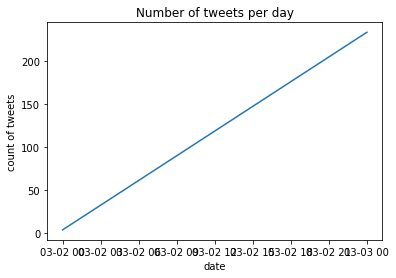

In [51]:
import matplotlib.pyplot as plt
df1=pd.DataFrame({'date':new_df.index, 'count of tweets':new_df.values})
print(df1)
x=df1['date']
y=df1['count of tweets']
plt.plot(x, y)  
plt.xlabel('date') 
plt.ylabel('count of tweets') 
plt.title('Number of tweets per day')  
# function to show the plot 
plt.show() 

In [52]:
gold_tweet_count=df.loc["Gold"]['tweet'].count()
altcoin_tweet_count=df.loc["Altcoin"]['tweet'].count()
crypto_tweet_count=df.loc["Cryptocurrency"]['tweet'].count()
bitcoin_tweet_count=df.loc["Bitcoin"]['tweet'].count()
yahoo_tweet_count=df.loc["Yahoo"]['tweet'].count()
google_tweet_count=df.loc["Google"]['tweet'].count()
coindesk_tweet_count=df.loc["coindesk"]['tweet'].count()
apple_tweet_count=df.loc["Apple"]['tweet'].count()
tweet_counts_by_keyword=[gold_tweet_count,altcoin_tweet_count,crypto_tweet_count,bitcoin_tweet_count,yahoo_tweet_count,google_tweet_count, coindesk_tweet_count, apple_tweet_count]
print(tweet_counts_by_keyword)
# keys=["Gold","Altcoin","Cryptocurrency","Bitcoin", "Yahoo","Google","coindesk","Apple"]
# for i in range(0,8):
#     new_df=df.groupby(['date', df.iloc[i]])['tweet'].count()
#     print(new_df)

[37, 30, 27, 27, 24, 34, 30, 28]


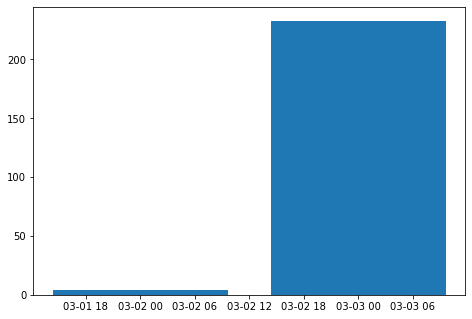

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=df1['date']
y=df1['count of tweets']
ax.bar(x,y)
plt.show()